## Putting  it all together with MultiClass classification
* Binary classification = onr thing or another (cat vs. dog, spam or not , 2-label ouptuts)

* Multi-class classification = more than one thing or another(cat vs. dog vs. chicken)

###  1.1 Creating a toy multi-class dataset

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set up hyper parameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


In [ ]:
# 1. Create  multi_class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std= 1.5 , random_state=RANDOM_SEED)

# 2 Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.float32)

# 3. Split into train and test
X_blob_train , X_blob_test , y_blob_train ,y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)


In [ ]:
y_blob_train

tensor([1., 0., 2., 2., 0., 0., 0., 1., 3., 0., 0., 0., 3., 2., 3., 2., 1., 1.,
        3., 2., 2., 2., 3., 1., 3., 2., 3., 0., 1., 0., 0., 1., 1., 3., 0., 2.,
        2., 1., 1., 3., 1., 1., 2., 3., 3., 0., 0., 0., 1., 0., 0., 0., 2., 0.,
        1., 1., 0., 0., 2., 2., 3., 1., 0., 2., 1., 3., 2., 2., 2., 1., 0., 2.,
        3., 1., 1., 1., 2., 0., 0., 1., 2., 3., 1., 3., 3., 2., 3., 3., 2., 2.,
        1., 0., 0., 1., 2., 1., 3., 1., 2., 1., 3., 3., 3., 0., 2., 1., 2., 3.,
        1., 1., 2., 0., 3., 3., 2., 0., 2., 0., 3., 2., 0., 0., 2., 2., 0., 1.,
        2., 0., 3., 3., 2., 3., 2., 1., 3., 1., 1., 1., 1., 0., 0., 1., 0., 2.,
        3., 0., 0., 0., 0., 0., 1., 0., 3., 0., 0., 2., 2., 0., 0., 3., 0., 3.,
        3., 3., 0., 2., 0., 1., 2., 2., 2., 3., 0., 1., 1., 0., 1., 2., 0., 3.,
        2., 1., 3., 2., 3., 0., 3., 1., 1., 2., 2., 2., 2., 2., 2., 0., 3., 3.,
        2., 1., 1., 2., 3., 1., 0., 0., 1., 3., 0., 1., 3., 3., 2., 3., 3., 3.,
        1., 0., 0., 1., 0., 3., 2., 1., 

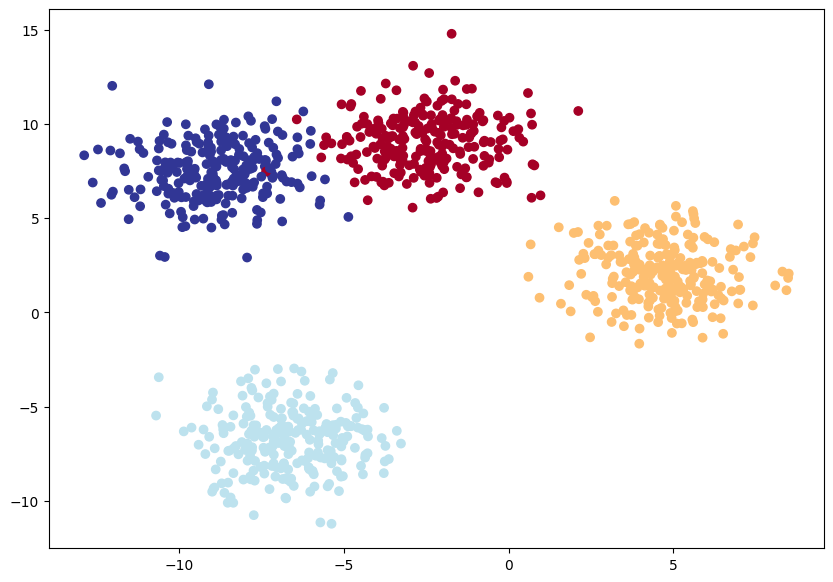

In [ ]:
# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob,cmap=plt.cm.RdYlBu)

## 2. Building the model

In [ ]:
from torch import nn

# set device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# bulid the model

class multi_class_classification(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=32)
        self.layer3 = nn.Linear(in_features=32, out_features=16)
        self.layer4 = nn.Linear(in_features=16, out_features=10)
        self.layer5 = nn.Linear(in_features=10, out_features=4)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        return self.layer5(self.relu(self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))))


In [ ]:
modelv1 = multi_class_classification().to(device)

In [ ]:
# modelv1.state_dict()

In [ ]:
# set up loss and optimizer
loss_fn = nn.CrossEntropyLoss()


# set up optimizer
optimizer = torch.optim.SGD(params=modelv1.parameters(), lr=0.01)

In [ ]:
# getting prediction probab for a multiclass

# modelv1(X_blob_test)

Logits(raw output of the model)  ->Pred probs( use `torch.softmax()` ), -> Pred Labels (take the argmax of the predictions probabilities)

In [ ]:
modelv1.eval()
with torch.inference_mode():
    y_logits = modelv1(X_blob_test.to(device))
y_logits[:10]

tensor([[ 1.4711e-01, -3.6349e-03,  1.3635e-01,  4.2163e-01],
        [ 1.4475e-01,  4.7462e-02,  1.4680e-01,  3.7508e-01],
        [ 1.6805e-01,  6.5609e-03,  1.9723e-01,  3.4897e-01],
        [ 1.5456e-01, -3.9561e-04,  1.4519e-01,  4.0894e-01],
        [ 1.3938e-01,  2.4234e-02,  1.4477e-01,  3.9638e-01],
        [ 1.4338e-01,  4.8285e-02,  1.4784e-01,  3.6782e-01],
        [ 1.7079e-01,  2.5524e-02,  1.7672e-01,  3.5778e-01],
        [ 1.3975e-01,  3.1247e-02,  1.3937e-01,  3.9640e-01],
        [ 1.8419e-01, -6.8543e-03,  2.1149e-01,  3.2041e-01],
        [ 1.4023e-01,  2.9734e-02,  1.4235e-01,  3.9446e-01]], device='cuda:0')

In [ ]:
# concert our model's logits ouptuts to prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 1.4711e-01, -3.6349e-03,  1.3635e-01,  4.2163e-01],
        [ 1.4475e-01,  4.7462e-02,  1.4680e-01,  3.7508e-01],
        [ 1.6805e-01,  6.5609e-03,  1.9723e-01,  3.4897e-01],
        [ 1.5456e-01, -3.9561e-04,  1.4519e-01,  4.0894e-01],
        [ 1.3938e-01,  2.4234e-02,  1.4477e-01,  3.9638e-01]], device='cuda:0')
tensor([[0.2401, 0.2065, 0.2375, 0.3159],
        [0.2399, 0.2177, 0.2404, 0.3020],
        [0.2452, 0.2086, 0.2524, 0.2938],
        [0.2417, 0.2070, 0.2395, 0.3118],
        [0.2387, 0.2127, 0.2400, 0.3086]], device='cuda:0')


In [ ]:
# predicted categorie is that has maximum predicted probablility
ma = torch.max(y_pred_probs[0])
category = torch.argmax(y_pred_probs[0])
ma , category

(tensor(0.3159, device='cuda:0'), tensor(3, device='cuda:0'))

In [ ]:
# convert our model's predictions probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')

## 1.5 Creating the training loop and testing loop for a multi-class PyTorch model

In [ ]:
epoches = 1000

for epoch in range(epoches):
    # training loop
    modelv1.train()

    # caluclate the predictions
    pred_logits = modelv1(X_blob_train.to(device))
    pred_probab = torch.softmax(pred_logits, dim=1)
    pred_labels = torch.argmax(pred_probab, dim=1)

    # caluclate the loss
    loss = loss_fn(pred_logits, y_blob_train.to(torch.long).to(device))

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backpropogation
    loss.backward()

    # optimization step
    optimizer.step()


    # testing  loop
    if epoch%20==0:
        modelv1.eval()
        with torch.inference_mode():
            y_test_logits = modelv1(X_blob_test.to(device))
            # y_test_probab = torch.softmax(y_test_logits, dim=1)
            # y_test_preds  = torch.argmax(y_test_probab, dim=1)

            test_loss = loss_fn(y_test_logits, y_blob_test.to(torch.long).to(device))
        print(f"epoch: {epoch} | train loss: {loss} | test loss: {test_loss}")




epoch: 0 | train loss: 1.399240255355835 | test loss: 1.378434658050537
epoch: 20 | train loss: 1.384576439857483 | test loss: 1.3634653091430664
epoch: 40 | train loss: 1.3721061944961548 | test loss: 1.350873589515686
epoch: 60 | train loss: 1.3603416681289673 | test loss: 1.338661789894104
epoch: 80 | train loss: 1.3472172021865845 | test loss: 1.324528455734253
epoch: 100 | train loss: 1.3319106101989746 | test loss: 1.3074640035629272
epoch: 120 | train loss: 1.3135632276535034 | test loss: 1.286452054977417
epoch: 140 | train loss: 1.291296124458313 | test loss: 1.2605905532836914
epoch: 160 | train loss: 1.2645777463912964 | test loss: 1.2295039892196655
epoch: 180 | train loss: 1.233607292175293 | test loss: 1.1935083866119385
epoch: 200 | train loss: 1.199933648109436 | test loss: 1.1551021337509155
epoch: 220 | train loss: 1.1654536724090576 | test loss: 1.1171003580093384
epoch: 240 | train loss: 1.1284202337265015 | test loss: 1.0783289670944214
epoch: 260 | train loss: 1.0

In [ ]:
def accuracy_fn(y_pred, y_actual):
    accurate = torch.eq(y_pred, y_actual).sum().item()
    return (accurate*100)/len(y_actual)

In [ ]:
# testing
modelv1.eval()

with torch.inference_mode():
    y_logits = modelv1(X_blob_test.to(device))
    y_test_probab = torch.softmax(y_logits, dim=1)
    y_preds = torch.argmax(y_test_probab,dim=1).to(torch.float32).to('cpu')

print(y_preds[:10])
print(y_preds[:10])

accuracy_fn( y_preds.to(torch.float32), y_blob_test)

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])
tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])


99.5

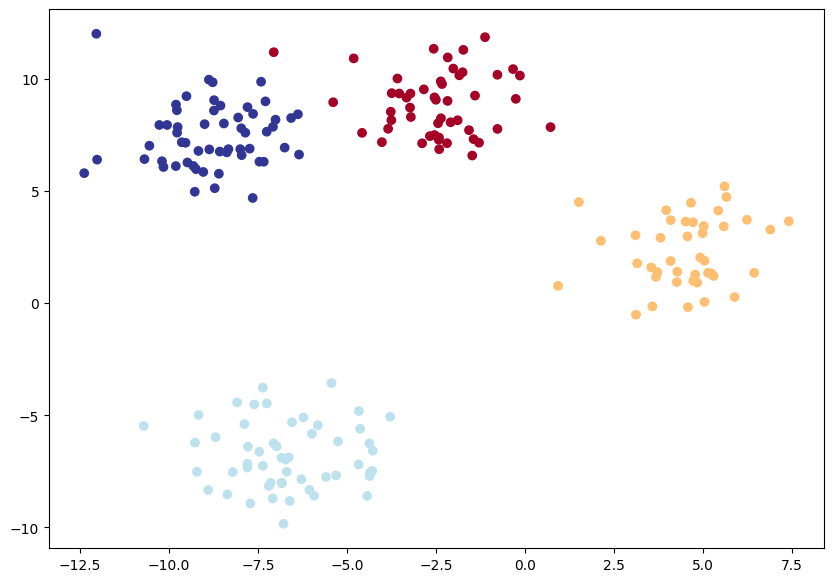

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob_test[:,0], X_blob_test[:,1], c = y_preds,cmap=plt.cm.RdYlBu)

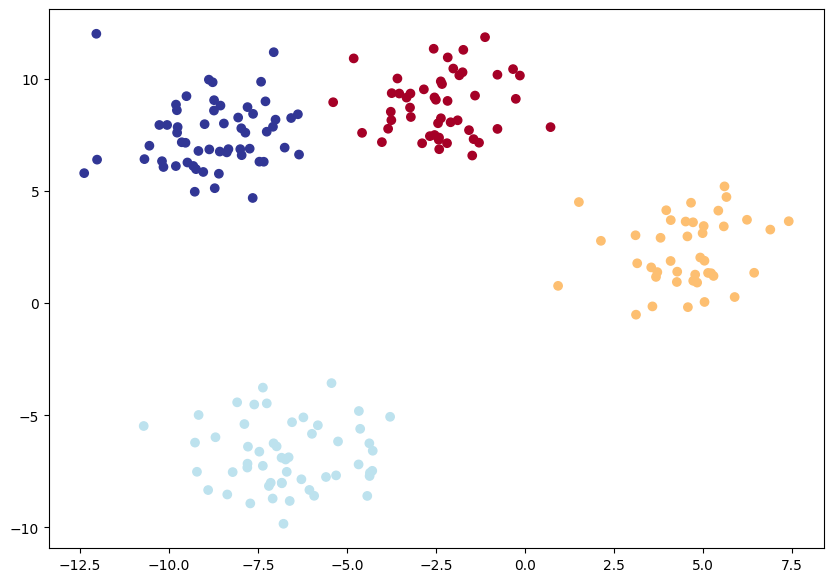

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob_test[:,0], X_blob_test[:,1], c = y_blob_test,cmap=plt.cm.RdYlBu)

# A few more classification metrics.. (to evalute our classification model)

* Acuuracy -> `torchmetrics.Accuracy()` or `sklearn.metrics.accuracy_score()`
* Precision -> `torcmetrics.Precision()`  or `sklearn.metrics.precision_score()`-> leads to less false positive
* Recall -> `torchmetrics.Recall()`or `sklearn.metrics.recall_score()` -> leads to false negatives
* f1- score -> `torchmetrics.f1_score()` or `sklearn.metrics.f1_score()`-> combination of precision and recall
* Confusion matrix -> `torchmetrics.ConfusionMatrix()`->
* Classification report

If you wwant acess to a lot of PyTorch metrics use torchmetrics

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from torchmetrics import Accuracy

# setup metriic
torchmetric_accuracy = Accuracy(task = 'multiclass', num_classes=4)

# caluclate accuracy
torchmetric_accuracy(y_preds.to('cpu'), y_blob_test)


tensor(0.9950)